In [70]:
import requests
import json
from citipy import citipy
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from config import api_key

#for citipy documentations, see https://github.com/wingchen/citipy

In [71]:
#set how many pulls will be done. This is to make sure we are not overlimit

pull_number = 20
half_number = int(pull_number/2)

half_number

10

In [72]:
# Down the line, we are required to split between souther and northen hemisphere for regression
# let's make it so first 50% of pull is for north, the rest of 50% is for south

#Create random latt and longitude
north_lat = []
south_lat = []

north_lon = []
south_lon = []

lat = []
lon = []


        

In [73]:
for x in range(0 , half_number):
        a = random.uniform(0,70.0)
        b = random.uniform(-70.0,70.0)
        north_lat.append(a)
        north_lon.append(b)        
        lat.append(a)
        lon.append(b)
for y in range(half_number, pull_number ):
        a = random.uniform(-70.0,-0.1)
        b = random.uniform(-70.0,70.0)
        south_lat.append(a)
        south_lon.append(b)        
        lat.append(a)
        lon.append(b) 

In [48]:
lat

[15.508418954623904,
 21.838010160248405,
 23.410983304995582,
 33.067757411033256,
 39.53302464670278,
 0.42057659396715463,
 26.77230404144101,
 24.122714819276354,
 13.999362272548858,
 24.120948251229986,
 -39.09058100384671,
 -12.169800252161977,
 -57.43421178271025,
 -8.48256865692126,
 -21.86359981089482,
 -24.35496111730312,
 -35.9715795195141,
 -10.025987853714533,
 -54.62014595709918,
 -34.14104806762476,
 38.101304747430255,
 2.5482582779324336,
 40.75131641721795,
 38.35523165746042,
 44.32169801551277,
 25.47774953743315,
 20.431618319478506,
 69.88972804441602,
 51.08464052474586,
 65.29965791358195,
 -2.6215995412370035,
 -47.72722627351288,
 -69.45470673192618,
 -20.746381886327235,
 -61.305754630778026,
 -66.62277810015827,
 -43.278770195914454,
 -28.602176121032038,
 -8.090729754591635,
 -39.30699319149595]

In [74]:
#Create json pull request.



#Singular key trial
temperature = []
humidity = []
cloudiness = []
wind_speed = []
city_name = []
descriptions = []
lat_temp = []
lon_temp = []


In [75]:
#Looping the request
y = 0

#remember, set the last number in range() to limit how many request per pull. 
for y in range(0,pull_number):

    url_lat = "http://api.openweathermap.org/data/2.5/weather?lat="+ str(lat[y]) + "&lon=" +str(lon[y]) + "&appid="+api_key +"&units=imperial"
    response = requests.get(url_lat)
    weather = response.json()
    temperature.append(weather["main"]["temp"])
    humidity.append(weather["main"]["humidity"])
    cloudiness.append(weather["clouds"]["all"])
    wind_speed.append(weather["wind"]["speed"])
    lat_temp.append(lat[y])
    lon_temp.append(lon[y])
    city = citipy.nearest_city(lat[y], lon[y])
    city_name.append(city.city_name)
    printout = ("City name is: " +str(city_name[y]),
               "Temperature is: " +str(temperature[y]) + " Fahrenheit",
                "Humidity is: " +str(humidity[y]) +" %",
                "Cloudiness is: "+str(cloudiness[y]) +" %",
                "Wind Speed is: "+str(wind_speed[y])  +" mph"
               )
    descriptions.append(printout)
    
    


In [102]:
# fill this cell with writing output to CSV
ind = np.arange(0,len(descriptions) )
city_out = pd.DataFrame({"City Prints": descriptions,
             "Index":ind}).set_index("Index")
out_path = ("output/city_desc.csv")
city_out.to_csv(out_path)

In [103]:
#cells above requires pull. Be wary of doing too many pulls!


This scatter plot is trying to find relationship between latitude to temperature (F)


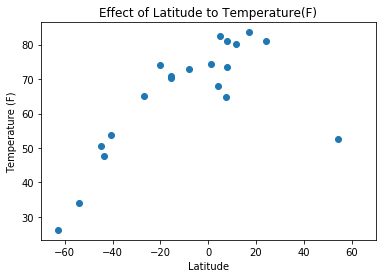

In [104]:
#Create Scatter Plot 1
#Temperature (F) vs Latitude 





plt.scatter(x = lat_temp, y=temperature)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Effect of Latitude to Temperature(F)")
plt.xlim(-70,70)
plt.savefig("output/scatter1")

print("This scatter plot is trying to find relationship between latitude to temperature (F)")

This scatter plot is trying to find relationship between latitude to humidity


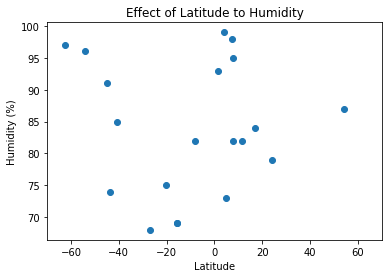

In [105]:
#Create Scatter Plot 2
#Humidity (%) vs Latitude
plt.scatter(x = lat_temp, y=humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Effect of Latitude to Humidity")
plt.xlim(-70,70)
plt.savefig("output/scatter2")
print("This scatter plot is trying to find relationship between latitude to humidity")

This scatter plot is trying to find relationship between latitude to cloudiness


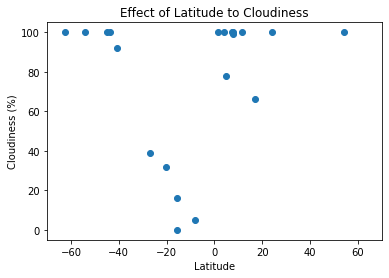

In [106]:
#Create Scatter Plot 3
#Cloudiness (%) vs Latitude
plt.scatter(x = lat_temp, y=cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Effect of Latitude to Cloudiness")
plt.xlim(-70,70)
plt.savefig("output/scatter3")
print("This scatter plot is trying to find relationship between latitude to cloudiness")

This scatter plot is trying to find relationship between latitude to wind speed


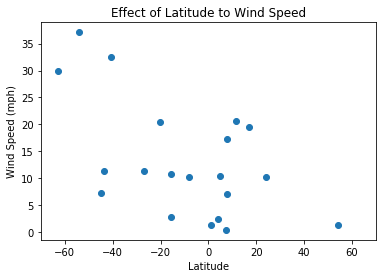

In [107]:
#Create Scatter Plot 4
#Wind Speed vs Latitude
plt.scatter(x = lat_temp, y=wind_speed)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Effect of Latitude to Wind Speed")
plt.xlim(-70,70)
plt.savefig("output/scatter4")
print("This scatter plot is trying to find relationship between latitude to wind speed")

In [108]:
#Automated
#The values stored in n_values and s_values are temperature, humidity, cloud, and wind speed. In that order!
explanation = ["Temperature", "Humidity","Cloud","Wind Speed"]

n_values = []
s_values = []

#This is to make the latitude usable 
north_lat = np.asarray(north_lat)
south_lat = np.asarray(south_lat)



In [109]:
#The North Loop. Basically, we add list of list

a=[]
for j in range (0,half_number):
    a.append(temperature[j] )
n_values.append(a)

a=[]
for j in range (0,half_number):
    a.append(humidity[j] )
n_values.append(a)

a=[]
for j in range (0,half_number):
    a.append(cloudiness[j] )
n_values.append(a)

a=[]
for j in range (0,half_number):
    a.append(wind_speed[j] )
n_values.append(a)

#for i in range (0, half_number):
#    n_values.append(humidity[i] )
   # n_values.append (cloudiness[i] )
    #n_values.append (wind_speed[i])


In [110]:
#The South Loop
a=[]
for j in range (half_number, pull_number):
    a.append(temperature[j] )
s_values.append(a)

a=[]
for j in range (half_number, pull_number):
    a.append(humidity[j] )
s_values.append(a)

a=[]
for j in range (half_number, pull_number):
    a.append(cloudiness[j] )
s_values.append(a)

a=[]
for j in range (half_number, pull_number):
    a.append(wind_speed[j] )
s_values.append(a)



In [111]:
n_values

[[81.14, 74.52, 67.98, 64.85, 80.22, 81.14, 83.59, 52.59, 73.4, 82.49],
 [79, 93, 99, 98, 82, 82, 84, 87, 95, 73],
 [100, 100, 100, 100, 100, 99, 66, 100, 100, 78],
 [10.22, 1.39, 2.53, 0.45, 20.56, 17.27, 19.44, 1.28, 7.18, 10.49]]

In [137]:
#North Linregress Loop
#again, in order the value is correlation between latitude and : temperature, humidity, cloudiness, wind speed 

slope_n=[]
intercept_n =[]
rvalue_n=[]
pvalue_n=[]
stderr_n=[]
n_regress = []
n_desc = []

for i in range(0,len(n_values) ):
    a
    slope_1, intercept_1, rvalue_1, pvalue_1, stderr_1 = st.linregress(north_lat, n_values[i])
    slope_n.append(slope_1)
    reg1 = intercept_1 + slope_1 * north_lat
    desc1 = "y =" + str(round(intercept_1,3)) + "+ "+ str(round(slope_1,3)) + "x"
    n_regress.append(reg1)
    n_desc.append(desc1)


In [138]:
n_desc[0]

'y =79.155+ -0.356x'

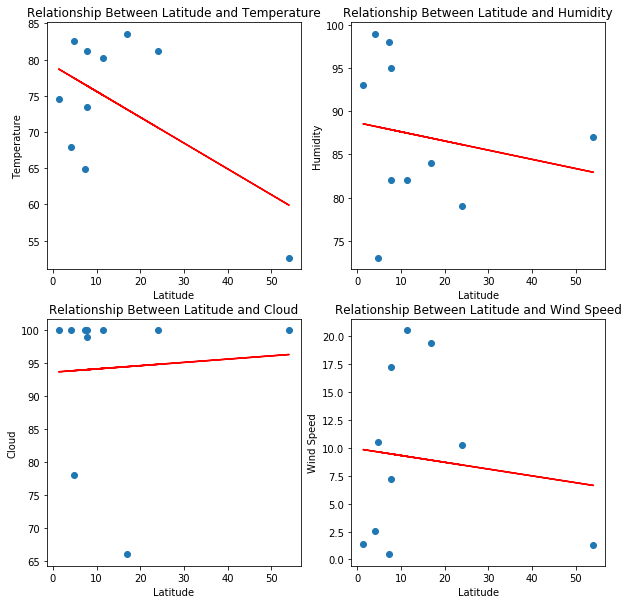

In [141]:
#automatically create subplots and regressions line

fig_n, axs = plt.subplots(2 , 2 , figsize = (10,10))
c=0

for a in range(0,2):
    for b in range(0, 2):
        axs[a,b].scatter(north_lat,n_values[c])
        axs[a,b].plot(north_lat,n_regress[c], color="red")
        axs[a,b].set_title("Relationship Between Latitude and "+explanation[c])
        axs[a,b].set_xlabel("Latitude")
        axs[a,b].set_ylabel(explanation[c])
        c = c +1


In [114]:
#South Linregress Loop
#again, in order the value is correlation between latitude and : temperature, humidity, cloudiness, wind speed 

slope_s=[]
intercept_s =[]
rvalue_s=[]
pvalue_s=[]
stderr_s=[]


for i in range(0,len(n_values) ):
    
    slope_2, intercept_2, rvalue_2, pvalue_2, stderr_2 = st.linregress(north_lat, n_values[i])
    slope.append(slope_n)

NameError: name 'slope' is not defined